# Model to create description for apartment

## Get Data from DB

In [2]:
import pandas as pd
import psycopg2 as ps
from sqlalchemy import create_engine

In [3]:
# DB CONFIG
db_name = "adsproject"
db_user = "ads"
db_password = "admin123!"
db_host = "postgres"
db_port = "5432"

table_name = 'airbnb'
table_name_sentiment = "airbnb_sentiment"

In [4]:
def read_table_to_dataframe(db_name, db_user, db_password, db_host, db_port, table_name):
    # Establish a connection to the PostgreSQL database
    conn = ps.connect(database=db_name, user=db_user, password=db_password, host=db_host, port=db_port)
    # Read the table from the PostgreSQL database into a DataFrame
    df = pd.read_sql(f'SELECT * FROM {table_name};', conn) # type: ignore
    # Close the connection
    conn.close()
    return df

In [129]:
# or read from data
df = pd.read_csv("../data/airbnb_rental_prices_combined_sentiment.csv", sep=";")


In [ ]:
# Call the function to read the table from the PostgreSQL database into a DataFrame
df = read_table_to_dataframe(db_name, db_user, db_password, db_host, db_port, table_name_sentiment)

# Display the DataFrame
df.head()

## Feature engineering

In [130]:
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,name,price,price_reduced,guests,bedrooms,beds,bathrooms,lat,lng,nr_of_ratings,...,rating_communication,rating_cleanliness,rating_data_accuracy,rooms,price_y,district,mean_rental_price,Subjectivity_median,Polarity_median,comments_list
0,Serviced Studio Zürich City #B,44.0,0.0,2,1,1,1.0,47.40581,8.55173,36,...,0.0,0.0,0.0,2,44.0,Unterstrass,1522.0,0.0,0.450000,['Zum Übernachten optimal für eine Person.\nFü...
1,2.5 Zimmerwohnung mit Garten,40.0,0.0,2,1,1,1.0,47.36336,8.46183,0,...,0.0,0.0,0.0,2,40.0,Albisrieden,1573.0,NaN,NaN,NaN
2,Spannende Wohnung in Zürich Örlikon,62.0,0.0,2,1,1,1.0,47.40388,8.54967,3,...,5.0,4.7,5.0,2,62.0,Unterstrass,1522.0,0.0,0.478571,['Das Haus ist perfekt an das Zentrum von Züri...
3,Geschätzt einfache Wohnung,66.0,0.0,2,1,1,1.0,47.40140,8.49900,0,...,0.0,0.0,0.0,2,66.0,Höngg,1518.0,NaN,NaN,NaN
4,leider die Wohnung ist nicht verfügbar,64.0,0.0,2,1,1,0.0,47.42600,8.54490,0,...,0.0,0.0,0.0,2,64.0,Seebach,1445.0,NaN,NaN,NaN


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  701 non-null    object 
 1   price                 701 non-null    float64
 2   price_reduced         701 non-null    float64
 3   guests                701 non-null    int64  
 4   bedrooms              701 non-null    int64  
 5   beds                  701 non-null    int64  
 6   bathrooms             701 non-null    float64
 7   lat                   701 non-null    float64
 8   lng                   701 non-null    float64
 9   nr_of_ratings         701 non-null    int64  
 10  rating_overall        701 non-null    float64
 11  rating_valueformoney  701 non-null    float64
 12  rating_location       701 non-null    float64
 13  rating_checkin        701 non-null    float64
 14  rating_communication  701 non-null    float64
 15  rating_cleanliness    7

In [132]:
df.describe()

,price,price_reduced,guests,bedrooms,beds,bathrooms,lat,lng,nr_of_ratings,rating_overall,...,rating_location,rating_checkin,rating_communication,rating_cleanliness,rating_data_accuracy,rooms,price_y,mean_rental_price,Subjectivity_median,Polarity_median
count,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,...,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,579.000000,563.000000,563.000000
mean,191.808845,16.764622,3.275321,1.386591,1.844508,1.110556,47.377550,8.534902,37.099857,3.413766,...,3.406419,3.451070,3.439943,3.377175,3.410556,3.275321,188.155492,1904.746114,0.010001,0.603445
std,114.123119,61.903706,1.587389,0.707343,1.450148,0.212744,0.019654,0.024217,69.017938,2.146085,...,2.190786,2.217441,2.210896,2.176975,2.194058,1.587389,111.305577,385.273322,0.035457,0.217108
min,40.000000,0.000000,2.000000,1.000000,1.000000,0.000000,47.316160,8.460970,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,40.000000,1089.000000,0.000000,-0.212500
25%,120.000000,0.000000,2.000000,1.000000,1.000000,1.000000,47.365010,8.518410,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,119.000000,1522.000000,0.000000,0.481667
50%,153.000000,0.000000,3.000000,1.000000,1.000000,1.000000,47.375200,8.535990,10.000000,4.670000,...,4.700000,4.800000,4.800000,4.700000,4.800000,3.000000,150.000000,1830.000000,0.000000,0.597619
75%,226.000000,0.000000,4.000000,2.000000,2.000000,1.000000,47.387350,8.549840,38.000000,4.890000,...,4.900000,5.000000,5.000000,4.900000,4.900000,4.000000,223.000000,2179.000000,0.000000,0.750000
max,700.000000,581.000000,12.000000,5.000000,25.000000,1.500000,47.432640,8.620730,547.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,12.000000,700.000000,3088.000000,0.333333,1.000000


In [133]:
df.isnull().sum()

name                      0
price                     0
price_reduced             0
guests                    0
bedrooms                  0
beds                      0
bathrooms                 0
lat                       0
lng                       0
nr_of_ratings             0
rating_overall            0
rating_valueformoney      0
rating_location           0
rating_checkin            0
rating_communication      0
rating_cleanliness        0
rating_data_accuracy      0
rooms                     0
price_y                   0
district                  0
mean_rental_price       122
Subjectivity_median     138
Polarity_median         138
comments_list           138
dtype: int64

In [134]:
df[["Polarity_median", "Subjectivity_median", "comments_list", "mean_rental_price"]].describe()

,Polarity_median,Subjectivity_median,mean_rental_price
count,563.000000,563.000000,579.000000
mean,0.603445,0.010001,1904.746114
std,0.217108,0.035457,385.273322
min,-0.212500,0.000000,1089.000000
25%,0.481667,0.000000,1522.000000
50%,0.597619,0.000000,1830.000000
75%,0.750000,0.000000,2179.000000
max,1.000000,0.333333,3088.000000


In [135]:
df_comments = df[df['comments_list'].notna()]

In [136]:
df_comments.comments_list.isnull().sum()

0

In [137]:
print(df_comments.shape)
print(df_comments.columns.values)

(563, 24)
['name' 'price' 'price_reduced' 'guests' 'bedrooms' 'beds' 'bathrooms'
 'lat' 'lng' 'nr_of_ratings' 'rating_overall' 'rating_valueformoney'
 'rating_location' 'rating_checkin' 'rating_communication'
 'rating_cleanliness' 'rating_data_accuracy' 'rooms' 'price_y' 'district'
 'mean_rental_price' 'Subjectivity_median' 'Polarity_median'
 'comments_list']


# Finetune GPT-2 Model

## Text preparation

In [69]:
import os
import ast
import re
import random
import datasets
import transformers
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from transformers import AutoTokenizer, TFGPT2LMHeadModel
from datasets import Dataset, load_dataset

# Log Level and suppress extensive tf warnings
os.environ["TRANSFORMERS_VERBOSITY"] = "info"
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
print(tf.__version__)
print(transformers.__version__)

2.12.0
4.29.2


In [70]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_virtual_device_configuration(gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=8192)])
  except RuntimeError as e:
    print(e)

In [71]:
# Try to run on TPU if available
# Detect hardware, return appropriate distribution strategy
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
    print("Running on TPU ", tpu.cluster_spec().as_dict()["worker"])
except ValueError:
    tpu = None
if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.TPUStrategy(tpu)
else:
    strategy = tf.distribute.get_strategy()
print("REPLICAS: ", strategy.num_replicas_in_sync)

REPLICAS:  1


In [138]:
df_comments['comments_list'] = df_comments['comments_list'].apply(lambda x: ast.literal_eval(x))

/var/folders/dl/9sprwshn5b32zcly7h58qzs00000gn/T/ipykernel_4202/3240144772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comments['comments_list'] = df_comments['comments_list'].apply(lambda x: ast.literal_eval(x))


In [73]:
# create a row for each string in string array
df_comments = df_comments.explode('comments_list')
df_comments = df_comments.reset_index(drop=True)
df_comments

,name,price,price_reduced,guests,bedrooms,beds,bathrooms,lat,lng,nr_of_ratings,...,rating_communication,rating_cleanliness,rating_data_accuracy,rooms,price_y,district,mean_rental_price,Subjectivity_median,Polarity_median,comments_list
0,Serviced Studio Zürich City #B,44.0,0.0,2,1,1,1.0,47.40581,8.55173,36,...,0.0,0.0,0.0,2,44.0,Unterstrass,1522.0,0.0,0.450,Zum Übernachten optimal für eine Person . Für ...
1,Serviced Studio Zürich City #B,44.0,0.0,2,1,1,1.0,47.40581,8.55173,36,...,0.0,0.0,0.0,2,44.0,Unterstrass,1522.0,0.0,0.450,Super Gastgeber ! Studio für das Geld absolut ...
2,Serviced Studio Zürich City #B,44.0,0.0,2,1,1,1.0,47.40581,8.55173,36,...,0.0,0.0,0.0,2,44.0,Unterstrass,1522.0,0.0,0.450,Gut gelegene und günstige Unterkunft mitten in...
3,Serviced Studio Zürich City #B,44.0,0.0,2,1,1,1.0,47.40581,8.55173,36,...,0.0,0.0,0.0,2,44.0,Unterstrass,1522.0,0.0,0.450,"Für Kurzübernachtungen gut , sauber sowohl Zim..."
4,Serviced Studio Zürich City #B,44.0,0.0,2,1,1,1.0,47.40581,8.55173,36,...,0.0,0.0,0.0,2,44.0,Unterstrass,1522.0,0.0,0.450,naja
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4573,*Luxus-Penthouse im Herzen des trendigen Zürich*,650.0,0.0,3,2,2,1.5,47.38940,8.51880,30,...,4.9,4.9,5.0,3,650.0,Höngg,1830.0,0.0,0.755,Eine außergewöhnlich stilvolle und komfortable...
4574,*Luxus-Penthouse im Herzen des trendigen Zürich*,650.0,0.0,3,2,2,1.5,47.38940,8.51880,30,...,4.9,4.9,5.0,3,650.0,Höngg,1830.0,0.0,0.755,"Lieber Nick und Familie , es war mir eine Freu..."
4575,*Luxus-Penthouse im Herzen des trendigen Zürich*,650.0,0.0,3,2,2,1.5,47.38940,8.51880,30,...,4.9,4.9,5.0,3,650.0,Höngg,1830.0,0.0,0.755,"Lucas und Claudio sind wundervolle Gastgeber ,..."
4576,*Luxus-Penthouse im Herzen des trendigen Zürich*,650.0,0.0,3,2,2,1.5,47.38940,8.51880,30,...,4.9,4.9,5.0,3,650.0,Höngg,1830.0,0.0,0.755,"Liebe Tina , es war mir eine wahre Freude , Si..."


In [74]:
def clean_text(text):
    RE_PUNCTUATION = re.compile("([!?.,;-])")
    RE_TAGS = re.compile(r"<[^>]+>")
    RE_ASCII = re.compile(r"[^A-Za-zÀ-ž,.!?0-9 ]", re.IGNORECASE)
    RE_WSPACE = re.compile(r"\s+", re.IGNORECASE)

    # remove all other stuff
    text = re.sub(RE_TAGS, " ", text) # type: ignore
    text = re.sub(RE_ASCII, " ", text)
    text = re.sub(RE_PUNCTUATION, r" \1 ", text)
    text = re.sub(RE_WSPACE, " ", text)

    # return processed text
    return text

In [75]:
df_comments["comments_list"] = df_comments["comments_list"].map(
    lambda x: clean_text(x) if isinstance(x, str) else x)

In [76]:
df_comments

,name,price,price_reduced,guests,bedrooms,beds,bathrooms,lat,lng,nr_of_ratings,...,rating_communication,rating_cleanliness,rating_data_accuracy,rooms,price_y,district,mean_rental_price,Subjectivity_median,Polarity_median,comments_list
0,Serviced Studio Zürich City #B,44.0,0.0,2,1,1,1.0,47.40581,8.55173,36,...,0.0,0.0,0.0,2,44.0,Unterstrass,1522.0,0.0,0.450,Zum Übernachten optimal für eine Person . Für ...
1,Serviced Studio Zürich City #B,44.0,0.0,2,1,1,1.0,47.40581,8.55173,36,...,0.0,0.0,0.0,2,44.0,Unterstrass,1522.0,0.0,0.450,Super Gastgeber ! Studio für das Geld absolut ...
2,Serviced Studio Zürich City #B,44.0,0.0,2,1,1,1.0,47.40581,8.55173,36,...,0.0,0.0,0.0,2,44.0,Unterstrass,1522.0,0.0,0.450,Gut gelegene und günstige Unterkunft mitten in...
3,Serviced Studio Zürich City #B,44.0,0.0,2,1,1,1.0,47.40581,8.55173,36,...,0.0,0.0,0.0,2,44.0,Unterstrass,1522.0,0.0,0.450,"Für Kurzübernachtungen gut , sauber sowohl Zim..."
4,Serviced Studio Zürich City #B,44.0,0.0,2,1,1,1.0,47.40581,8.55173,36,...,0.0,0.0,0.0,2,44.0,Unterstrass,1522.0,0.0,0.450,naja
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4573,*Luxus-Penthouse im Herzen des trendigen Zürich*,650.0,0.0,3,2,2,1.5,47.38940,8.51880,30,...,4.9,4.9,5.0,3,650.0,Höngg,1830.0,0.0,0.755,Eine außergewöhnlich stilvolle und komfortable...
4574,*Luxus-Penthouse im Herzen des trendigen Zürich*,650.0,0.0,3,2,2,1.5,47.38940,8.51880,30,...,4.9,4.9,5.0,3,650.0,Höngg,1830.0,0.0,0.755,"Lieber Nick und Familie , es war mir eine Freu..."
4575,*Luxus-Penthouse im Herzen des trendigen Zürich*,650.0,0.0,3,2,2,1.5,47.38940,8.51880,30,...,4.9,4.9,5.0,3,650.0,Höngg,1830.0,0.0,0.755,"Lucas und Claudio sind wundervolle Gastgeber ,..."
4576,*Luxus-Penthouse im Herzen des trendigen Zürich*,650.0,0.0,3,2,2,1.5,47.38940,8.51880,30,...,4.9,4.9,5.0,3,650.0,Höngg,1830.0,0.0,0.755,"Liebe Tina , es war mir eine wahre Freude , Si..."


In [77]:
data = df_comments[["comments_list"]]
data.columns = ["text"]
data

,text
0,Zum Übernachten optimal für eine Person . Für ...
1,Super Gastgeber ! Studio für das Geld absolut ...
2,Gut gelegene und günstige Unterkunft mitten in...
3,"Für Kurzübernachtungen gut , sauber sowohl Zim..."
4,naja
...,...
4573,Eine außergewöhnlich stilvolle und komfortable...
4574,"Lieber Nick und Familie , es war mir eine Freu..."
4575,"Lucas und Claudio sind wundervolle Gastgeber ,..."
4576,"Liebe Tina , es war mir eine wahre Freude , Si..."


In [78]:
# create dataset from pandas df
data = Dataset.from_pandas(data)
data

Dataset({
    features: ['text'],
    num_rows: 4578
})

In [79]:
MAX_TOKENS = 128
EOS_TOKEN = "<|endoftext|>"
PAD_TOKEN = "<|pad|>"

# this will download and initialize the pre trained tokenizer
tokenizer = AutoTokenizer.from_pretrained(
    "dbmdz/german-gpt2",
    eos_token=EOS_TOKEN,
    pad_token=PAD_TOKEN,
    max_length=MAX_TOKENS,
    is_split_into_words=True,
)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [80]:
output = {}
# texts to numeric vectors of MAX_TOKENS
def tokenize_function(examples, tokenizer=tokenizer):
    # Add start and end token to each comment
    examples = [ex + EOS_TOKEN for ex in examples["text"]]
    # tokenizer created input_ids and attention_mask as output
    output = tokenizer(
        examples,
        add_special_tokens=True,  # Only adds pad not eos and bos
        max_length=MAX_TOKENS,
        truncation=True,
        padding=True,
    )
    # shift labels for next token prediction
    # set padding token labels to -100 which is ignored in loss computation
    output["labels"] = [x[1:] for x in output["input_ids"]] # type: ignore
    output["labels"] = [
        [-100 if x == tokenizer.pad_token_id else x for x in y]
        for y in output["labels"] # type: ignore
    ]
    # truncate input ids and attention mask to account for label shift
    output["input_ids"] = [x[:-1] for x in output["input_ids"]] # type: ignore
    output["attention_mask"] = [x[:-1] for x in output["attention_mask"]] # type: ignore
    return output

data = data.map(
    tokenize_function,
    batched=True,
    num_proc=strategy.num_replicas_in_sync,
    remove_columns=["text"],
    load_from_cache_file=True,
)
print(data)

Map:   0%|          | 0/4578 [00:00<?, ? examples/s]

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 4578
})


In [81]:
data.set_format(type="python", columns=["input_ids", "attention_mask", "labels"])
data = data.train_test_split(
    test_size=0.15, shuffle=True, seed=1, load_from_cache_file=True
)
print(data)

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 3891
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 687
    })
})


In [82]:
train_tensor_inputs = tf.convert_to_tensor(data["train"]["input_ids"])
train_tensor_labels = tf.convert_to_tensor(data["train"]["labels"])
train_tensor_mask = tf.convert_to_tensor(data["train"]["attention_mask"])
train = tf.data.Dataset.from_tensor_slices(
    (
        {"input_ids": train_tensor_inputs, "attention_mask": train_tensor_mask},
        train_tensor_labels,
    )
)

test_tensor_inputs = tf.convert_to_tensor(data["test"]["input_ids"])
test_tensor_labels = tf.convert_to_tensor(data["test"]["labels"])
test_tensor_mask = tf.convert_to_tensor(data["test"]["attention_mask"])
test = tf.data.Dataset.from_tensor_slices(
    (
        {"input_ids": test_tensor_inputs, "attention_mask": test_tensor_mask},
        test_tensor_labels,
    )
)

## Build and train GPT-2 Model

In [101]:
# Model params
BATCH_SIZE_PER_REPLICA = 28 #64 #256 #512 #28
EPOCHS = 3
INITAL_LEARNING_RATE = 0.001
try:
    BATCH_SIZE = BATCH_SIZE_PER_REPLICA * strategy.num_replicas_in_sync
except NameError as e:
    BATCH_SIZE = BATCH_SIZE_PER_REPLICA
BUFFER_SIZE = len(train)

# prepare data for consumption
train_ds = (
    train.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)
)
test_ds = test.batch(BATCH_SIZE, drop_remainder=True)

In [102]:
# Drecreasing learning rate scheduler
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    INITAL_LEARNING_RATE,
    decay_steps=500,
    decay_rate=0.7,
    staircase=True)

# initialize model, use_cache=False important! else wrong shape at loss calc
with strategy.scope():
    model = TFGPT2LMHeadModel.from_pretrained(
        "dbmdz/german-gpt2",
        use_cache=False,
        pad_token_id=tokenizer.pad_token_id,
        eos_token_id=tokenizer.eos_token_id,
    )
    model.resize_token_embeddings(len(tokenizer))
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule) # type: ignore
    model.compile(optimizer=optimizer, loss=model.hf_compute_loss)
    model.summary()

All model checkpoint layers were used when initializing TFGPT2LMHeadModel.

All the layers of TFGPT2LMHeadModel were initialized from the model checkpoint at dbmdz/german-gpt2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.


Model: "tfgpt2lm_head_model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 transformer (TFGPT2MainLaye  multiple                 124447488 
 r)                                                              
                                                                 
Total params: 124,447,488
Trainable params: 124,447,488
Non-trainable params: 0
_________________________________________________________________


In [103]:
# Stop training when validation acc starts dropping
now = datetime.now().strftime("%Y-%m-%d_%H%M")
# Create callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor="val_loss", verbose=1, patience=1, restore_best_weights=True
    ),
]

In [86]:
# Train Model
steps_per_epoch = int(BUFFER_SIZE // BATCH_SIZE)
print(
    f"Model Params:\nbatch_size: {BATCH_SIZE}\nEpochs: {EPOCHS}\n"
    f"Step p. Epoch: {steps_per_epoch}\n"
    f"Initial Learning rate: {INITAL_LEARNING_RATE}"
)
hist = model.fit(
    train_ds,
    validation_data=test_ds,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=callbacks,
    verbose=1,
)

Model Params:
batch_size: 28
Epochs: 3
Step p. Epoch: 138
Initial Learning rate: 0.001
Epoch 1/3


2023-05-21 23:46:02.382622: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


138/138 [==============================] - 227s 2s/step - loss: 4.3493 - val_loss: 2.8827
Epoch 2/3
138/138 [==============================] - 212s 2s/step - loss: 2.3305 - val_loss: 2.5360
Epoch 3/3
138/138 [==============================] - 213s 2s/step - loss: 1.5722 - val_loss: 2.3967


In [100]:
model.save_weights("./saved_model/weights/gptweights")

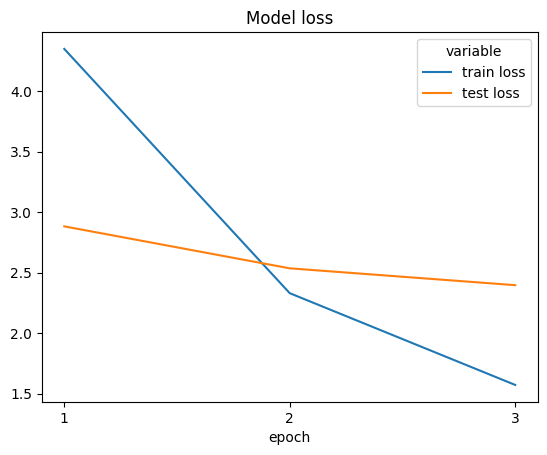

In [111]:
loss = pd.DataFrame(
    {"train loss": hist.history["loss"], "test loss": hist.history["val_loss"]}
).melt()
loss["epoch"] = loss.groupby("variable").cumcount() + 1
sns.lineplot(x="epoch", y="value", hue="variable", data=loss).set(
    title="Model loss",
    ylabel="",
    xticks=range(1, loss["epoch"].max() + 1),
    xticklabels=loss["epoch"].unique(),
);

In [117]:
model.load_weights("./saved_model/weights/gptweights")

In [118]:
from transformers import pipeline

description = pipeline(
    "text-generation", # type: ignore
    model=model,
    tokenizer=tokenizer,
)

In [139]:
df_comments.head(1)

,name,price,price_reduced,guests,bedrooms,beds,bathrooms,lat,lng,nr_of_ratings,...,rating_communication,rating_cleanliness,rating_data_accuracy,rooms,price_y,district,mean_rental_price,Subjectivity_median,Polarity_median,comments_list
0,Serviced Studio Zürich City #B,44.0,0.0,2,1,1,1.0,47.40581,8.55173,36,...,0.0,0.0,0.0,2,44.0,Unterstrass,1522.0,0.0,0.45,[Zum Übernachten optimal für eine Person.\nFür...


In [140]:
df_comments.loc[0].values

array(['Serviced Studio Zürich City #B', 44.0, 0.0, 2, 1, 1, 1.0,
       47.40581, 8.55173, 36, 4.28, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2, 44.0,
       'Unterstrass', 1522.0, 0.0, 0.4499999999999999,
       list(['Zum Übernachten optimal für eine Person.\nFür Längere Aufenthalte im Zimmer nicht so geeignet.\nDas WLAN sollte verbessert werden.\nAnsonsten absolut empfehlenswert, mit allem Nötigen ausgestattet.\n\nKann mich den vorherigen Gästen bezüglich des nahegelegenen Kirchturms nur anschließen, der kann einem den Schlaf rauben.\nAber sonst ist die Gegend sehr ruhig und vor allem super ans ÖV-Netz angeschlossen.', 'Super Gastgeber!\nStudio für das Geld absolut zu empfehlen. Beim nächsten mal gerne wieder.', 'Gut gelegene und günstige Unterkunft mitten in Oerlikon und damit sehr gut an Zürich Zentrum angebunden. Unkompliziert.', 'Für Kurzübernachtungen gut, sauber sowohl Zimmer als auch Badzimmer.\nGratis WLan.', 'naja', 'Freundliche Hausbewohner und ich konnte auf dem Innenhof kostenlos 

In [148]:
input_model = "Serviced Studio Zürich City Preis 44 CHF mit 1 Schlafzimmer"
text_apa = description(input_model, max_length=200, num_return_sequences=1)

In [149]:
gen_text = pd.DataFrame(text_apa)
print(gen_text.values[0:1][0][0])

Serviced Studio Zürich City Preis 44 CHF mit 1 Schlafzimmer, der Balkon ist sehr schön und die Nachbarschaft ist ruhig! 
